# E-76 Obligated Federal Funds Data Exploration
### From the Division of Local Assistance 

E-76's or "Authorizations to Proceed" is a federal authorization of funds to establish the reimbursement date for a phase of work 

#### Data Sources: 
- https://dot.ca.gov/programs/local-assistance/reports/e-76-obligated

In this notebook, we will be looking to see what types of data is in the spreadsheet as well as begin to clean it for futher analysis


In [61]:
from siuba import *
import numpy as np
import pandas as pd
from plotnine import *

In [3]:
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns', None)

## Reading Excel as a data dictionary
Can use this approach, but recommend the next with second one. 

In [3]:
#obligated = pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/obligated-projects.xlsx', sheet_name=['2014-2018', '2019', '2020', '2021'])

In [3]:
#print(obligated)

In [4]:
#print(type(obligated))

In [5]:
#len(obligated)

In [6]:
#print(type(obligated['2020']))

In [7]:
#obligated['2020'].info()

In [8]:
#obligated['2021'].info()

In [9]:
#obligated['2019'].info()

In [10]:
#obligated['2014-2018'].info()

In [11]:
#df1 = obligated['2014-2018']
#df2 = obligated['2019']
#df3 = obligated['2020']
#df4 = obligated['2021']

In [12]:
#pd_dct = {"pre2018": df1, "2019": df2, "2020":df3, "2021":df4}

In [13]:
#mdf = pd.concat(pd_dct, axis=0).reset_index(level=0).rename({'level_0':'key'}, axis=1)

In [14]:
#mdf

## Reading Excel with Concat

In [6]:
#attempt 2
## code source: https://pbpython.com/pandas-excel-tabs.html
odf = pd.concat(pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/obligated-projects.xlsx', sheet_name=None), ignore_index=True)



/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:73: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [7]:
odf.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,NaN,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,NaN,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,NaN,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,NaN,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,NaN


In [8]:
odf.tail()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
20016,Obligated,BRLO,5955(095),Orange County,2021-08-20 00:00:00,2021-08-27 00:00:00,2021-08-31 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,82000.00,0.00,82000.00,Authorized,5955,12,E-76 approved on,NaN,7.00,5.00,16.00,ORA020501,"Silverado Canyon Road Over Silverado Creek, Ap...",Bridge Replacement (tc).,2,2021-08-20 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20017,Obligated,HSIPL,5073(093),Orange,2021-08-17 00:00:00,2021-08-27 00:00:00,2021-08-30 00:00:00,2021-08-30 00:00:00,2021-09-08 00:00:00,21000.00,0.00,21000.00,Authorized,5073,12,E-76 approved on,NaN,30.00,3.00,9.00,SCAG015,Intersection Of Glassell St. & Palmyra Ave.,Install A New 2-phase Traffic Signal,2,2021-07-28 00:00:00,2021-08-26 00:00:00,SCAG,NaT,NaN
20018,Obligated,HSIPL,5073(078),Orange,2021-08-18 00:00:00,2021-08-27 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,0.00,0.00,188921.73,Authorized,5073,12,E-76 approved on,NaN,14.00,5.00,16.00,SCAG015,Intersection Of Glassell Street And Walnut Avenue,Protected Left-turn Signal Phasing,4,2021-08-13 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20019,Obligated,HSIPL,5073(080),Orange,2021-08-18 00:00:00,2021-08-27 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,0.00,0.00,69358.21,Authorized,5073,12,E-76 approved on,NaN,15.00,5.00,16.00,SCAG015,Intersection Of Chapman Avenue And James Street,Install Protected Left Turn Signal Phasing,4,2021-08-12 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20020,Obligated,CMSTPLN,6071(129),Orange County Transportation Authority,2021-08-23 00:00:00,2021-08-24 00:00:00,2021-08-31 00:00:00,2021-08-31 00:00:00,2021-09-09 00:00:00,8000000.00,47628875.00,53215649.00,Authorized,6071,12,E-76 approved on,NaN,84.00,7.00,9.00,ORA100511,State Route 55 From Interstate 405 To Intersta...,Add One Mixed-flow And High-occupancy Lane In ...,6,2021-06-01 00:00:00,2021-08-22 00:00:00,SCAG,NaT,NaN


In [9]:
print(len(odf))

20021


In [10]:
odf.sample(10)

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
8335,Obligated,CMLNI,5122(082),Porterville,2015-07-27,2015-08-04,2015-08-26,2015-08-28,2015-09-02,249000.00,0.00,282000.00,Authorized,5122.00,6,E-76 approved on E-76 approved on,NaN,8.00,24.00,5.00,NaN,Porterville Corporation Yard,Purchase 1 Street Sweeper,1,NaN,NaN,TCAG,NaN,NaN
13850,Obligated,ATPCML,5129(090),Oxnard,2019-04-04 00:00:00,2019-05-01 00:00:00,2019-05-14 00:00:00,2019-05-14 00:00:00,2019-05-22 00:00:00,100000.00,0.00,129201.34,Authorized,5129,7,E-76 approved on,NaN,1.00,13.00,8.00,VEN150907,Oxnard Boulevard From Us 101 To Gonzales Road.,"Installation Of Class Ii Bicycle Lanes, Bicycl...",1,2019-04-30 00:00:00,2019-04-30 00:00:00,SCAG,NaN,NaN
5547,Obligated,CMLNI,5287(039),Wasco,2016-10-20,2016-10-25,2016-10-26,2016-10-26,2016-11-01,-2599.32,0.00,-2935.74,Authorized,5287.00,6,E-76 approved on Prepared on 10/6/2015,NaN,5.00,1.00,6.00,KER140523,City Of Wasco,Purchase Cng Refuse Truck,3,NaN,NaN,KCOG,NaN,NaN
7030,Obligated,BRLSZD,5910(042),Mendocino County,2016-04-04,2016-04-12,2016-04-15,2016-04-15,2016-04-19,1291271.00,0.00,1460015.00,Authorized,5910.00,1,E-76 approved on Prepared on 10/12/2015,NaN,8.00,3.00,4.00,HBPLOCAL,Moore Street Bridge - Bridge No. 10c0048,Construct Seismic Retrofits,5,NaN,NaN,NON-MPO,NaN,NaN
1483,Obligated,HSIPL,5064(074),Pasadena,2018-05-21,2018-05-21,2018-05-21,2018-05-21,2018-05-30,-55500.00,0.00,-75000.00,Authorized,5064.00,7,E-76 approved on,NaN,NaN,0.00,9.00,SCAG015,Fair Oaks Ave./colorado Blvd; Lake Ave./mounta...,Pedestrian Safety Enhancements,3,NaN,NaN,SCAG,NaN,NaN
6824,Obligated,BRLO,5946(141),Tulare County,2016-03-10,2016-05-05,2016-05-06,2016-05-06,2016-05-13,80000.00,0.00,80000.00,Authorized,5946.00,6,E-76 approved on Prepared on 10/6/2015,NaN,56.00,1.00,7.00,TUL 12-130,Bridge 46c0300 On Avenue 108 Over Lakeland Canal,Replace 1 Lane Bridge With 2 Lane Bridge (tc),1,NaN,NaN,TCAG,NaN,NaN
11106,Obligated,STPLZ,5356(003),Del Mar,2014-07-15,2014-08-05,2014-08-06,2014-08-06,2014-08-07,436453.00,0.00,493000.00,Authorized,NaN,11,E-76 approved on E-76 approved on,NaN,21.00,1.00,1.00,NaN,North Torrey Pines (sorrento Oh) Br (57c 0207),Seismic Retrofit,12,NaN,NaN,SJCOG,NaN,NaN
11207,Obligated,SRTSL,5043(034),San Rafael,2014-06-09,2014-07-09,2014-07-22,2014-07-29,2014-07-29,399100.00,0.00,400000.00,Authorized,5043.00,4,E-76 approved on E-76 approved on,NaN,30.00,20.00,0.00,REG090001,Lindardo St: Woodland Ave - Andersen Dr And An...,"Construct Sidewalks, Install Median Fencing, S...",2,NaN,NaN,MTC,NaN,NaN
767,Obligated,STPL,5170(055),Kingsburg,2018-07-05,2018-07-16,2018-08-09,2018-08-09,2018-08-16,312556.00,0.00,353056.00,Authorized,5170.00,6,E-76 approved on,NaN,10.00,24.00,7.00,FRE150010,Bethel Avenue From Sr99 Sb Ramps To Golden State,Pavement Reconstruction (tc),3,2018-06-29,2018-07-06,CFCG,NaN,NaN
9412,Obligated,BPMPL,5929(226),San Joaquin,2015-03-30,2015-04-01,2015-04-20,2015-04-23,2015-04-23,492448.00,0.00,556250.00,Authorized,NaN,10,E-76 approved on E-76 approved on,NaN,2.00,22.00,0.00,SJ07-3002,Van Allen Road Over South Little Johns Creek (...,Repairs To Existing Scour Countermeasures,4,NaN,NaN,SCAG,NaN,NaN


In [9]:
## Adding Waiting data too

In [11]:
wdf = pd.concat(pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/E-76-Waiting-list.xlsx', sheet_name=None), ignore_index=True)



In [12]:
wdf.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Warning
0,DISTRICT,BPMP,5904(141),Humboldt County,2021-08-11,NaT,NaT,NaT,NaT,53348.54,0.00,60260.00,Hold for FTIP amendment.,5904,1,Prepared on 8/11/2021,43039.00,NaN,NaN,NaN,NaN,In Humboldt County On Mccann Road Over The Eel...,Bridge Preventive Maintenance,5,NaT,NaT,NON-MPO,2021-11-01,NaN
1,DISTRICT,ATPL,5904(151),Humboldt County,2021-10-22,NaT,NaT,NaT,NaT,1358000.00,0.00,1358000.00,..,5904,1,Prepared on 10/22/2021,10.00,NaN,NaN,NaN,NaN,On Sr255 From The Dean Avenue/pacific Avenue I...,Class 1 Multi-use Trail (tc),5,NaT,NaT,NON-MPO,NaT,NaN
2,DISTRICT,BPMP,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,88.00,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,NaT,NaN
3,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,49.00,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaT,NaN
4,DISTRICT,HSIPL,5904(181),Humboldt County,2021-10-20,NaT,NaT,NaT,NaT,154662.00,0.00,178643.00,Hold for FTIP amendment.,5904,1,Prepared on 10/20/2021,12.00,NaN,NaN,NaN,NaN,Intersection Of Redwood Drive And Redway Drive...,Install Enhanced Pedestrian Crossing With Bulb...,3,NaT,NaT,NON-MPO,NaT,NaN


In [13]:
df = pd.concat([odf, wdf], ignore_index=True)

In [14]:
df.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28,Warning
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,NaN,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,NaN,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,NaN,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,NaN,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,NaN,NaN


In [15]:
df.sample(10)

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28,Warning
1920,Obligated,BRLS,5906(107),Shasta County,2018-04-11,2018-04-11,2018-04-12,2018-04-13,2018-04-16,1967252.00,-1967252.00,0.00,Authorized,5906.00,2,E-76 approved on,NaN,6.00,2.00,3.00,BRDGE-LUM,"Old Forty-four Drive @ Oak Run Creek, Bridge N...",Bridge Replacement,6,2018-04-05,2018-04-11,STPA,NaN,NaN,NaN
9063,Obligated,TCSPDE,09CA(028),Vista,2015-06-09,2015-06-09,2015-06-09,2015-06-09,2015-06-10,-91798.64,0.00,-91798.64,Authorized,5382.00,11,E-76 approved on E-76 approved on,NaN,0.00,0.00,1.00,VISTA08,West Vista Way,Roadway Widening,2,NaN,NaN,SDAG,NaN,NaN,NaN
4094,Obligated,ATPL,5956(247),Riverside County,2017-05-16,2017-06-08,2017-06-19,2017-06-23,2017-06-27,1860000.00,0.00,1860000.00,Authorized,5956.00,8,E-76 approved on,NaN,23.00,15.00,4.00,RIV140840,West Side Of Grapefruit Boulevard (state Route...,Pedestrian Improvements And Traffic Signal Mod...,2,2017-05-16,2017-06-08,SCAG,NaN,NaN,NaN
2326,Obligated,STPL,5305(017),Huron,2017-08-25,2018-02-14,2018-02-14,2018-02-16,2018-03-08,805800.00,0.00,808200.00,Authorized,5305.00,6,E-76 approved on,NaN,198.00,2.00,20.00,FRE150009,Tornado Avenue From Lassen Avenue To Azteca Blvd.,Construct Street Widening With Class Ii Bike L...,3,2017-07-31,2017-08-24,CFCG,NaN,NaN,NaN
682,Obligated,STPL,5100(025),Palo Alto,2018-08-22,2018-08-22,2018-08-23,2018-08-24,2018-08-29,0.00,638000.00,750000.00,Authorized,5100.00,4,E-76 approved on,NaN,0.00,2.00,5.00,SCL170021,In Proximity To The California Ave Caltrain St...,Develop A Comprehensive Planning Document Simi...,1,2018-08-06,2018-08-22,MTC,NaN,NaN,NaN
12531,Obligated,BHLS,5333(014),Woodside,2014-03-12,2014-03-12,2014-03-12,2014-03-12,2014-03-13,-75423.47,0.00,0.00,Authorized,5333.00,4,E-76 approved on E-76 approved on,NaN,0.00,0.00,1.00,VAR991007,Kings Mountain Rd Over West Union Creek; 0.05 ...,Bridge Rehabilitation,2,NaN,NaN,MTC,NaN,NaN,NaN
20353,Obligated,STPL,5197(039),Sanger,2021-10-06 00:00:00,2021-10-06 00:00:00,2021-10-06 00:00:00,2021-10-06 00:00:00,2021-10-15 00:00:00,-53281.16,0.00,-75621.03,Authorized,5197,6,E-76 approved on,NaN,6.00,0.00,9.00,FRE070617,Academy Ave From North Ave To 11th St,"Overlay/reconstruction, Widening To Add Turn L...",4,2021-09-30 00:00:00,2021-10-01 00:00:00,CFCG,NaT,NaN,NaN
3802,Obligated,ER,32L0(205),Santa Cruz County,2017-07-13,2017-07-26,2017-07-31,2017-07-31,2017-08-03,295955.00,0.00,334300.00,Authorized,5936.00,5,E-76 approved on,NaN,16.00,5.00,3.00,NaN,In The County Of Santa Cruz On Redwood Lodge ...,Reconstruct Road And Stabilize Slope,1,2017-07-10,2017-07-12,AMBAG,NaN,NaN,NaN
11864,Obligated,STPL,5373(020),Bell Gardens,2014-04-22,2014-05-12,2014-05-13,2014-05-21,2014-05-23,196000.00,0.00,201324.00,Authorized,5373.00,7,E-76 approved on E-76 approved on,NaN,20.00,9.00,2.00,LA11G1,Florence Place : Sudan Ave. To Scout Ave.,"Ac Pavement Overlay, Curb, Gutter, Sidewalk (tc)",1,NaN,NaN,SCAG,NaN,NaN,NaN
11532,Obligated,CASB05,5068(023),Redding,2014-07-01,2014-07-01,2014-07-01,2014-07-01,2014-07-02,0.00,0.00,22240.05,Authorized,5068.00,2,E-76 approved on E-76 approved on,NaN,0.00,0.00,1.00,NaN,"Proj Is W/i Counties: Las,plu,sha,sis, & Mod",Develop Comprehensive Mktg Pro,3,NaN,NaN,STPA,NaN,NaN,NaN


In [16]:
print(len(df))

20447


## Data Cleaning

In [17]:
from calitp import to_snakecase


In [18]:
df = to_snakecase(df)

In [19]:
df.head(1)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,waiting_days,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,today,unnamed:_28,warning
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN,NaN


In [20]:
df.agency.unique()

array(['Humboldt County', 'Mendocino County', 'Sacramento County',
       'Sutter County', 'Contra Costa County', 'Dinuba', 'Arvin',
       'Fresno', 'Tulare County', 'Palmdale', 'Los Angeles County',
       'Orange County Transportation Authority', 'Yolo County',
       'Nevada County', 'Fresno County', 'Ridgecrest', 'Lassen County',
       'Modoc County', 'Butte County', 'Yuba City', 'Concord',
       'Napa County', 'Pismo Beach', 'Ojai', 'Los Angeles', 'Chino Hills',
       'Indio', 'Moreno Valley', 'Turlock', 'Riverbank', 'Stockton',
       'Chula Vista', 'Sonoma County', 'Santa Clara County',
       'Kings County', 'Long Beach', 'Norwalk', 'Rancho Palos Verdes',
       'Southern California Association of Governments', 'Pasadena',
       'Riverside', 'Carlsbad', 'Santa Barbara County', 'Delano',
       'Merced County', 'South Lake Tahoe', 'Yuba County',
       'Metropolitan Transportation Commission', 'San Mateo',
       'Solano Transportation Authority', 'University Of California'

Some Agencies are all caps, others are not. Applying str.title() to correct this. 

In [21]:
df.agency = df.agency.str.title()

In [22]:
df.agency.unique()

array(['Humboldt County', 'Mendocino County', 'Sacramento County',
       'Sutter County', 'Contra Costa County', 'Dinuba', 'Arvin',
       'Fresno', 'Tulare County', 'Palmdale', 'Los Angeles County',
       'Orange County Transportation Authority', 'Yolo County',
       'Nevada County', 'Fresno County', 'Ridgecrest', 'Lassen County',
       'Modoc County', 'Butte County', 'Yuba City', 'Concord',
       'Napa County', 'Pismo Beach', 'Ojai', 'Los Angeles', 'Chino Hills',
       'Indio', 'Moreno Valley', 'Turlock', 'Riverbank', 'Stockton',
       'Chula Vista', 'Sonoma County', 'Santa Clara County',
       'Kings County', 'Long Beach', 'Norwalk', 'Rancho Palos Verdes',
       'Southern California Association Of Governments', 'Pasadena',
       'Riverside', 'Carlsbad', 'Santa Barbara County', 'Delano',
       'Merced County', 'South Lake Tahoe', 'Yuba County',
       'Metropolitan Transportation Commission', 'San Mateo',
       'Solano Transportation Authority', 'University Of California'

In [23]:
df.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,waiting_days,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,today,unnamed:_28,warning
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,NaN,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,NaN,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,NaN,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,NaN,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,NaN,NaN


In [24]:
df['waiting_days'].unique()

array([       nan, 4.3039e+04, 1.0000e+01, 8.8000e+01, 4.9000e+01,
       1.2000e+01, 8.0000e+01, 1.1600e+03, 1.2500e+02, 1.2900e+02,
       1.2400e+02, 6.5400e+02, 1.1500e+02, 5.4000e+01, 1.1800e+02,
       1.7900e+02, 3.4700e+02, 6.3600e+02, 5.5000e+02, 1.1000e+01,
       7.3000e+01, 5.0100e+02, 5.7300e+02, 3.3600e+02, 2.4000e+01,
       7.3300e+02, 3.3500e+02, 6.0000e+00, 6.9000e+01, 2.0800e+02,
       2.5500e+02, 1.5590e+03, 2.8000e+01, 6.1000e+01, 5.9000e+01,
       3.5500e+02, 1.5100e+02, 3.9200e+02, 9.6000e+01, 1.7000e+01,
       5.5000e+01, 1.9600e+02, 1.3000e+02, 4.0600e+02, 4.0500e+02,
       4.0400e+02, 5.8100e+02, 2.1000e+01, 9.1000e+01, 1.3900e+02,
       7.4000e+01, 1.4000e+01, 8.1000e+01, 1.1600e+02, 6.8000e+01,
       6.7000e+01, 1.5800e+02, 1.6000e+02, 5.0000e+00, 1.6100e+02,
       1.4300e+02, 1.0360e+03, 1.5930e+03, 5.2000e+01, 1.5880e+03,
       1.0060e+03, 1.2300e+02, 9.8000e+02, 8.2000e+01, 4.4100e+02,
       2.0420e+03, 7.5000e+01, 4.9500e+02, 5.7900e+02, 7.3900e

In [25]:
df.drop('waiting_days', axis=1, inplace=True)

In [26]:
df['today'].unique()

array([nan, '2020-01-01', '2019-06-06 9:00 am', '2021-01-04',
       Timestamp('2021-10-01 00:00:00'), NaT,
       Timestamp('2021-11-01 00:00:00')], dtype=object)

In [27]:
df.drop('today', axis=1, inplace=True)

In [28]:
df.drop('unnamed:_28', axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20447 entries, 0 to 20446
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                20447 non-null  object 
 1   prefix                  20447 non-null  object 
 2   project_no              20447 non-null  object 
 3   agency                  20447 non-null  object 
 4   prepared_date           20429 non-null  object 
 5   submit__to_hq_date      20272 non-null  object 
 6   hq_review_date          20240 non-null  object 
 7   submit_to_fhwa_date     20222 non-null  object 
 8   to_fmis_date            20222 non-null  object 
 9   fed_requested           20446 non-null  float64
 10  ac_requested            20447 non-null  float64
 11  total_requested         20446 non-null  object 
 12  status_comment          20447 non-null  object 
 13  locode                  18948 non-null  object 
 14  dist                    20447 non-null

### Finding NA in strings 

In [35]:
df.isnull().sum()

location                      0
prefix                        0
project_no                    0
agency                        0
prepared_date                18
submit__to_hq_date          175
hq_review_date              207
submit_to_fhwa_date         225
to_fmis_date                225
fed_requested                 1
ac_requested                  0
total_requested               1
status_comment                0
locode                     1499
dist                          0
status                        0
dist_processing_days       1879
hq_processing_days          216
fhwa_processing_days        216
ftip_no                    4165
project_location            543
type_of_work                  0
seq                           0
date_request_initiated    10605
date_completed_request    10776
mpo                           1
warning                   20405
dtype: int64

In [36]:
#converting the objects in total_requested to float 
df['total_requested'] = df['total_requested'].astype(float)

ValueError: could not convert string to float: '2748.3NA999'

* Issue here, and in the following row where 'NA' appears between numbers. Need to determine whether or not to manually override in the exel sheet. 

In [37]:
df >> filter(_.total_requested.str.contains("NA"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning
15547,Obligated,ER,38Y0(001),Los Angeles County,2019-11-12 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-19 00:00:00,1017276.52,-1019159.54,2748.3NA999,Authorized,5953,7,E-76 approved on,28.00,2.00,13.00,NaN,"Mulholland Hwy, Et Al Guardrail Replacement","Install Temporary Traffic Signs, Remove And Re...",2,2019-11-06 00:00:00,2019-11-13 00:00:00,SCAG,NaN
15548,Obligated,ER,38Y0(003),Los Angeles County,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-20 00:00:00,1033518.07,-1001297.90,30169.98NA99,Authorized,5953,7,E-76 approved on,8.00,22.00,14.00,NaN,Kanan Dume Rd From Mm 8.15 To Mm 11.75,"Install Temporary Traffic Signs, Remove & Repl...",2,2019-11-06 00:00:00,2019-11-13 00:00:00,SCAG,NaN


In [38]:
## removing row with string until we can clarify the true entry.

In [39]:
delete_row = df[df["total_requested"]== '2748.3NA999'].index
df = df.drop(delete_row)

In [40]:
delete_row = df[df["total_requested"]== '30169.98NA99'].index
df = df.drop(delete_row)

In [32]:
## another way to identify the entires that contain string
#df.loc[df['total_requested']=='2748.3NA999']
#df.loc[df['total_requested']=='30169.98NA99']

In [41]:
df['total_requested'] = df['total_requested'].astype(float)

In [42]:
print(df['prepared_date'].dtypes)

object


In [43]:
df['prepared_date'].unique()

array(['2018-12-18', '2018-12-17', '2018-12-07', ...,
       Timestamp('2021-10-06 00:00:00'), Timestamp('2021-09-28 00:00:00'),
       Timestamp('2021-09-21 00:00:00')], dtype=object)

In [44]:
print(df.dtypes)

location                   object
prefix                     object
project_no                 object
agency                     object
prepared_date              object
submit__to_hq_date         object
hq_review_date             object
submit_to_fhwa_date        object
to_fmis_date               object
fed_requested             float64
ac_requested              float64
total_requested           float64
status_comment             object
locode                     object
dist                        int64
status                     object
dist_processing_days      float64
hq_processing_days        float64
fhwa_processing_days      float64
ftip_no                    object
project_location           object
type_of_work               object
seq                         int64
date_request_initiated     object
date_completed_request     object
mpo                        object
warning                    object
dtype: object


In [45]:
cols = ['prepared_date','to_fmis_date','submit_to_fhwa_date','submit__to_hq_date','hq_review_date','date_request_initiated','date_completed_request']
df[cols] = df[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))


In [46]:
df.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20445 entries, 0 to 20446
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location                20445 non-null  object        
 1   prefix                  20445 non-null  object        
 2   project_no              20445 non-null  object        
 3   agency                  20445 non-null  object        
 4   prepared_date           20427 non-null  datetime64[ns]
 5   submit__to_hq_date      20270 non-null  datetime64[ns]
 6   hq_review_date          20238 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20220 non-null  datetime64[ns]
 8   to_fmis_date            20220 non-null  datetime64[ns]
 9   fed_requested           20444 non-null  float64       
 10  ac_requested            20445 non-null  float64       
 11  total_requested         20444 non-null  float64       
 12  status_comment          20445 non-null  object

## Finding Duplicates: 

In [49]:
df.duplicated().sum()

328

In [51]:
df.duplicated().value_counts()

False    20117
True       328
dtype: int64

In [52]:

df_duplicates = df.loc[df.duplicated(), :]

In [53]:
len(df_duplicates)

328

In [54]:
df_duplicates

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning
1313,FTA Transferred,FTACML,6261(022),Victor Valley Transit Authority,2018-05-07,2018-05-07,2018-05-07,2018-06-08,2018-06-20,2713000.00,0.00,2713000.00,Prog Code L40E,6261.00,8,FTA transferred on 6/20/2018,NaN,32.00,12.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
1314,FTA Transferred,FTACML,6071(133),Orange County Transportation Authority,2018-05-04,2018-05-04,2018-05-04,2018-06-08,2018-06-20,549000.00,0.00,549000.00,Prog Code M40E,6071.00,12,FTA transferred on 6/20/2018,NaN,35.00,12.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
1315,FTA Transferred,FTACML,6071(134),Orange County Transportation Authority,2018-05-10,2018-05-10,2018-05-10,2018-06-11,2018-06-20,4500000.00,0.00,4500000.00,Prog Code Z400,6071.00,12,FTA transferred on 6/20/2018,NaN,32.00,9.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
1629,FTA Transferred,FTACML,5006(876),Los Angeles,2018-04-10,2018-04-10,2018-04-10,2018-04-18,2018-05-14,1610850.00,0.00,1610850.00,Prog Code Z400,5006.00,7,FTA transferred on 5/14/2018,NaN,8.00,26.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
1764,FTA Transferred,FTASTPL,6065(220),Los Angeles County Metropolitan Transportation...,2018-03-13,2018-03-13,2018-03-13,2018-04-04,2018-05-02,2449778.00,0.00,2449778.00,Prog Code Z230,6065.00,7,FTA transferred on 5/2/2018,NaN,22.00,28.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19826,FTA Transferred,FTACML,6262(021),San Joaquin Regional Rail Commission,2021-06-30,2021-06-30,2021-06-30,2021-07-27,2021-08-03,7500000.00,0.00,7500000.00,Prog Code Z0E3,6262,10,FTA transferred on 8/3/2021,NaN,27.00,7.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SJCG,NaN
20438,DISTRICT,USFSSTPL,6190(034),Usda Forest Ser,NaT,NaT,NaT,NaT,NaT,220889.00,0.00,220889.00,prog code Z230,6190,3,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Usda Forest Service Transfer,1,NaT,NaT,NON-MPO,NaN
20439,DISTRICT,USFSSTPL,6190(034),Usda Forest Ser,NaT,NaT,NaT,NaT,NaT,308000.00,0.00,308000.00,prog code Z230,6190,3,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Usda Forest Service Transfer,1,NaT,NaT,NON-MPO,NaN
20440,DISTRICT,FTA,6190(035),Usda Forest Ser,NaT,NaT,NaT,NaT,NaT,220889.00,0.00,220889.00,prog code Z230,6190,3,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Fta Transfer,1,NaT,NaT,NON-MPO,NaN


In [55]:
df_duplicates.agency.nunique()

151

In [56]:
df_duplicates.agency.unique()

array(['Victor Valley Transit Authority',
       'Orange County Transportation Authority', 'Los Angeles',
       'Los Angeles County Metropolitan Transportation Authority',
       'South Coast Area Transit', 'Gardena',
       'City & County Of San Francisco, Mta/Parking & Traffic',
       'Santa Clara Valley Transportation Authority', 'Fresno',
       'Ventura County Transportation Commission', 'Simi Valley',
       'Madera', 'Redondo Beach', 'Access Services',
       'Southern California Regional Rail Authority',
       'Alameda - Contra Costa Transit District',
       'San Francisco Bay Area Water Transit Authority',
       'San Francisco Bay Area Rapid Transit District', 'Petaluma',
       'Santa Rosa', 'Mountain Area Regional Transit Authority',
       'Morongo Basin Transit Authority',
       'Golden Empire Transit District', 'Calaveras',
       'San Joaquin County', 'Stockton', 'Merced County', 'Turlock',
       'Stanislaus County', 'National City', 'Coronado', 'San Diego',
     

* We have small and large agencies represented here, from Los Angeles Metro, to Twentynine Palms. Lets see how they spread out through the districts


In [62]:
df_duplicates >> count(_.agency) >> arrange(-_.n)

,agency,n
115,Santa Cruz County,12
54,Los Angeles County Metropolitan Transportation...,10
78,Orange County Transportation Authority,10
52,Los Angeles,9
0,Access Services,8
...,...,...
137,Transportation Authority Of Marin,1
138,Tulare,1
147,Woodside,1
149,Yuba City,1


In [63]:
df_duplicates >> group_by(_.dist) >> count(_.agency) >> arrange(-_.n)

,dist,agency,n
61,5,Santa Cruz County,12
86,7,Los Angeles County Metropolitan Transportation...,10
151,12,Orange County Transportation Authority,10
84,7,Los Angeles,9
64,6,Fresno,8
...,...,...,...
141,11,Imperial County,1
142,11,National City,1
145,12,Anaheim,1
146,12,Brea,1


In [64]:
df_duplicates >> count(_.dist) >> arrange(-_.n)

,dist,n
6,7,61
3,4,57
5,6,38
2,3,31
7,8,28
4,5,24
9,10,21
11,12,21
10,11,17
0,1,12


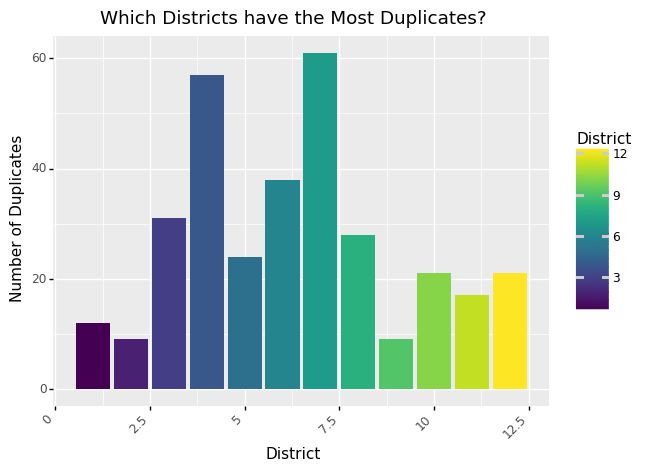

<ggplot: (8730574151958)>

In [65]:
(df_duplicates  
     >> count(_.dist)
     >> arrange(-_.n)
     >> ggplot(aes("dist", "n", fill="dist")) 
         + geom_col() 
         + theme(axis_text_x = element_text(angle = 45 , hjust=1))
         + labs(title='Which Districts have the Most Duplicates?', x='District', y='Number of Duplicates', fill="District")
)                          

In [66]:
#looking at a one entry 
df_duplicates >> filter(_.agency.str.contains('Access Services'))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning
4775,FTA Transferred,FTASTPLR,6312(023),Access Services,2017-03-13,2017-03-13,2017-03-13,2017-03-17,2017-03-22,64600000.00,0.00,64600000.00,Prog Code Z230,6312.00,7,FTA transferred on 3/22/2017,0.00,4.00,5.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
7100,FTA Transferred,FTASTPL,6312(022),Access Services,2016-03-02,2016-03-02,2016-03-02,2016-03-30,2016-04-05,2300000.00,0.00,2300000.00,Prog Code M230,6312.00,7,FTA transferred on 4/5/2016,0.00,28.00,6.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
7101,FTA Transferred,FTASTPL,6312(022),Access Services,2016-03-02,2016-03-02,2016-03-02,2016-03-30,2016-04-05,51000000.00,0.00,51000000.00,Prog Code Z230,6312.00,7,FTA transferred on 4/5/2016,0.00,28.00,6.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
14389,FTA Transferred,FTASTPL,6312(027),Access Services,2019-04-08,2019-04-08,2019-04-08,2019-07-09,2019-07-10,39708454.06,0.00,39708454.06,Prog Code Z230,6312,7,FTA transferred on 7/10/2019,NaN,92.00,1.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
14390,FTA Transferred,FTASTPL,6312(027),Access Services,2019-04-08,2019-04-08,2019-04-08,2019-07-09,2019-07-10,1586162.94,0.00,1586162.94,Prog Code Z230,6312,7,FTA transferred on 7/10/2019,NaN,92.00,1.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
14400,FTA Transferred,FTASTPL,6312(027),Access Services,2019-04-08,2019-04-08,2019-04-08,2019-07-09,2019-07-10,39708454.06,0.00,39708454.06,Prog Code Z230,6312,7,FTA transferred on 7/10/2019,NaN,92.00,1.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
14401,FTA Transferred,FTASTPL,6312(027),Access Services,2019-04-08,2019-04-08,2019-04-08,2019-07-09,2019-07-10,1586162.94,0.00,1586162.94,Prog Code Z230,6312,7,FTA transferred on 7/10/2019,NaN,92.00,1.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN
16807,FTA Transferred,FTASTPL,6312(029),Access Services,2020-02-24,2020-02-24,2020-02-24,2020-05-05,2020-05-18,69500000.00,0.00,69500000.00,Prog Code Z230,6312,7,FTA transferred on 5/18/2020,NaN,71.00,13.00,NaN,NaN,FTA Transfer,1,NaT,NaT,SCAG,NaN


In [67]:
#lots of FTA grants for Access Services, checking how many times this comes up
df_duplicates >> count(_.type_of_work) >> arrange(-_.n)

,type_of_work,n
58,FTA Transfer,81
17,Bridge Replacement (tc),9
16,Bridge Replacement,8
166,Road Rehabilitation,3
26,Class Ii Protected Bicycle Lanes,2
...,...,...
215,"Widen From 4-6 Lanes, New Traffic Signals At R...",1
216,Widen Road From 4 To 6 Lanes With Raised Media...,1
217,"Widen Roadway For Class 2 Bike Lanes, Sidewalk...",1
218,Widen Street To Four Lanes,1


In [68]:
#wondering if this tracks with the prefix
df_duplicates >> count(_.prefix) >> arrange(-_.n)

,prefix,n
26,FTACML,53
37,HSIPL,49
16,CML,41
44,STPL,31
12,BRLS,20
22,ER,17
3,ATPL,14
11,BRLO,14
31,FTASTPL,13
0,ACST-ER,8


* Okay, not as many FTA grants at the top, many unique ones at the bottom. Grouping by `type_of_work` to see which programs are most used with "FTA Transfer"

In [69]:
df_duplicates >> group_by(_.type_of_work) >> count(_.prefix) >> arrange(-_.n)

,type_of_work,prefix,n
62,FTA Transfer,FTACML,53
67,FTA Transfer,FTASTPL,13
16,Bridge Replacement,BRLS,8
17,Bridge Replacement (tc),BRLO,7
70,FTA Transfer,FTFERPL16,3
...,...,...,...
228,"Widen From 4-6 Lanes, New Traffic Signals At R...",RPSTPL,1
229,Widen Road From 4 To 6 Lanes With Raised Media...,HSIPL,1
230,"Widen Roadway For Class 2 Bike Lanes, Sidewalk...",ATPL,1
231,Widen Street To Four Lanes,STPL,1


* Looking at the prefix by agency.

In [70]:
df_duplicates >> group_by(_.agency) >> count(_.prefix) >> arrange(-_.n)

,agency,prefix,n
116,Orange County Transportation Authority,FTACML,10
0,Access Services,FTASTPL,7
80,Los Angeles County Metropolitan Transportation...,FTACML,6
182,Santa Cruz County,ACST-ER,5
184,Santa Cruz County,ER,5
...,...,...,...
227,Woodside,STPL,1
228,Yolo County,BRLO,1
229,Yolo County,HRRRL,1
230,Yuba City,BRLS,1


### Dropping the Duplicates

In [71]:
df.drop_duplicates(inplace=True)

In [75]:
df.duplicated().sum()

0

## Separate Project Number into two columns

In [76]:
df[["projectID", "projectNO"]] = df["project_no"].str.split(pat="(", expand=True)


In [77]:
df.projectNO = [x.replace(")", "") for x in df.projectNO]

In [78]:
df.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN,5904,121
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,008
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,004
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214


## Locode and Project ID Columns 

Hypothesis:
    Project IDs and Locodes, or unique agency identifiers, are the same 
    
As it stands now, these columns have a mix of letters and numbers, making it hard to compare the two. 
In this block we will work to convert these columns, while trying to not convert the non-numeric numbers. 

In [1]:
df.info()

NameError: name 'df' is not defined

In [80]:
df.sample(10)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO
839,Obligated,HSIPL,5129(083),Oxnard,2018-07-09,2018-07-09,2018-07-25,2018-07-25,2018-08-08,0.00,0.00,-6327.04,Authorized,5129.00,7,E-76 approved on,0.00,16.00,14.00,SCAG015,Victoria Avenue From North Of Fifth Street To ...,"Install Median Curb, Stamped Concrete & St. Li...",5,2018-07-09,2018-07-09,SCAG,NaN,5129,083
12139,Obligated,STPL,5399(021),California City,2014-04-14,2014-04-16,2014-04-17,2014-04-17,2014-04-18,238359.00,0.00,355752.00,Authorized,NaN,9,E-76 approved on E-76 approved on,2.00,1.00,1.00,KER120403,Hacienda Boulevard From Manzanita Avenue To So...,Pavement Rehabilitation,2,NaT,NaT,STANCOG,NaN,5399,021
7963,Obligated,HSIPL,5025(062),Santa Cruz,2015-10-28,2015-11-10,2015-11-19,2015-11-20,2015-11-30,120031.00,0.00,120031.00,Authorized,5025.00,5,E-76 approved on Prepared on 10/6/2015,13.00,10.00,10.00,HSIP08,Various Locations Throughout Santa Cruz,Upgrade Traffic Signals (tc),3,NaT,NaT,AMBAG,NaN,5025,062
496,Obligated,CML,5060(284),Fresno,2018-10-08,2018-10-08,2018-10-08,2018-10-11,2018-10-15,-257611.47,0.00,-219626.49,Authorized,5060.00,6,E-76 approved on,NaN,3.00,4.00,FRE130034,Fresno St From B St To Divisadero; Van Ness Av...,Install Its Communications (tc),5,NaT,NaT,CFCG,NaN,5060,284
11207,Obligated,SRTSL,5043(034),San Rafael,2014-06-09,2014-07-09,2014-07-22,2014-07-29,2014-07-29,399100.00,0.00,400000.00,Authorized,5043.00,4,E-76 approved on E-76 approved on,30.00,20.00,0.00,REG090001,Lindardo St: Woodland Ave - Andersen Dr And An...,"Construct Sidewalks, Install Median Fencing, S...",2,NaT,NaT,MTC,NaN,5043,034
9823,Obligated,STPL,5484(006),Wildomar,2014-08-14,2015-02-03,2015-02-18,2015-02-19,2015-03-01,135984.00,0.00,153602.00,Authorized,NaN,8,E-76 approved on E-76 approved on,173.00,16.00,10.00,RIV130401,Clinton-keith Road From Stable Lanes Road To G...,Repair Failed Pavement And Pavement Microsurfa...,1,NaT,NaT,SCAG,NaN,5484,006
15626,Obligated,ER,32L0(028),Mendocino County,2020-01-27,2020-01-27,2020-01-27,2020-01-27,2020-01-28,-1.22,0.00,-1.90,Authorized,5910,1,E-76 approved on,4.00,0.00,1.00,NaN,"Mountain View Road, Cr 510 Pm 14.39",Permanent Restoration,5,2020-01-23,2020-01-24,NON-MPO,NaN,32L0,028
2768,Obligated,BRLO,5932(079),Tuolumne County,2017-11-27,2018-01-08,2018-01-08,2018-01-08,2018-01-12,667189.00,0.00,667189.00,Authorized,5932.00,10,E-76 approved on,55.00,0.00,4.00,HBPLOCAL,Hardin Flat Road Over Sf Tuolumne River (br 32...,Bridge Replacement (tc),5,2017-11-14,2017-12-26,NON-MPO,NaN,5932,079
12445,Obligated,CMLG,6066(096),Sd Assoc Gov'T,2014-03-24,2014-03-24,2014-03-24,2014-03-24,2014-03-24,0.00,0.00,80174.48,Authorized,NaN,11,E-76 approved on E-76 approved on,0.00,0.00,0.00,SAN11A,Various Locations In San Diego County,Region Rideshare Program -component Of Overall...,3,NaT,NaT,SANDAG,NaN,6066,096
10658,Obligated,HSIPL,5358(015),Rosemead,2014-10-13,2014-10-13,2014-10-13,2014-10-17,2014-10-20,-6398.82,0.00,0.00,Authorized,5358.00,7,E-76 approved on E-76 approved on,0.00,4.00,3.00,SCAG015,Sr 19 (rosemead Blvd) Between Valley Blvd And ...,Pedestrian And Bike Path,2,NaT,NaT,SCAG,NaN,5358,015


In [81]:
## dataset has a column NBIL, 32L0, 40A0, 5.92E+03, 38Y0, 38R0

## for now, leaving the errors. 

In [82]:
def get_num(x):
    try:
        return int(x)
    except Exception:
        try:
            return float(x)
        except Exception:
            return x

        
# https://stackoverflow.com/questions/56474599/how-to-ignore-errors-in-pandas-to-numeric-and-change-str-to-int

In [83]:
df['locode'] = df['locode'].apply(get_num)

In [84]:
df['projectID'] = df['projectID'].apply(get_num)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20117 entries, 0 to 20446
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location                20117 non-null  object        
 1   prefix                  20117 non-null  object        
 2   project_no              20117 non-null  object        
 3   agency                  20117 non-null  object        
 4   prepared_date           20102 non-null  datetime64[ns]
 5   submit__to_hq_date      19945 non-null  datetime64[ns]
 6   hq_review_date          19914 non-null  datetime64[ns]
 7   submit_to_fhwa_date     19896 non-null  datetime64[ns]
 8   to_fmis_date            19896 non-null  datetime64[ns]
 9   fed_requested           20116 non-null  float64       
 10  ac_requested            20117 non-null  float64       
 11  total_requested         20116 non-null  float64       
 12  status_comment          20117 non-null  object

In [86]:
compare_col = np.where(df["locode"] == df["projectID"], True, False)
df["compare_id_locode"] = compare_col
df.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN,5904,121,True
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,008,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,004,False
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244,True
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214,True


In [87]:
df['compare_id_locode'].value_counts()

True     16378
False     3739
Name: compare_id_locode, dtype: int64

## Getting Unique Locodes

In [88]:
group = df.groupby('agency')
crosswalk_all = group.apply(lambda x: x['locode'].unique())
print(crosswalk_all)

agency
Access Services                                             [6312]
Agoura Hills                                           [5435, nan]
Ala-Con Costa T                                             [6002]
Alameda                                                     [5014]
Alameda - Contra Costa Transit District                     [6002]
                                                    ...           
Yrts                                                         [nan]
Yuba City                                                   [5163]
Yuba County                                                 [5916]
Yucaipa                                    [5457, nan, 5954, NBIL]
Yucca Valley                                           [5466, nan]
Length: 671, dtype: object


In [119]:
#crosswalk_all.to_csv('crosswalk_all.csv')

In [90]:
#https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

nan_rows = df[df['locode'].isnull()]

In [91]:
nan_rows.sample(10)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
10807,Obligated,RPSTPL,5938(214),Stanislaus,2014-09-11,2014-09-11,2014-09-11,2014-09-12,2014-09-16,840000.00,-840000.00,0.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,1.00,4.00,NaN,In Stan Co From Sr 108 Along Claribel Rd To Oa...,Construct Class I Bike Path Both Sides Claribe...,2,NaT,NaT,NON-MPO,NaN,5938,214,False
12283,Obligated,HSIPL,5006(533),Los Angeles,2014-02-21,2014-04-01,2014-04-03,2014-04-04,2014-04-06,0.00,0.00,303022.00,Authorized,NaN,7,E-76 approved on E-76 approved on,39.00,3.00,2.00,SCAG015\HSIP1-,"Woodley/raymer, Desoto/knapp At Metrolink",Upgrade Traffic Signal Equipment,3,NaT,NaT,SANDAG,NaN,5006,533,False
9671,Obligated,STPL,5006(508),Los Angeles,2015-03-18,2015-03-18,2015-03-18,2015-03-18,2015-03-18,-91103.89,0.00,0.00,Authorized,NaN,7,E-76 approved on E-76 approved on,0.00,0.00,0.00,LA0C8048,Cahuenga Blvd: Magnolia Blvd To Lankershim Blvd,Intersection Signal Improvements,5,NaT,NaT,SCAG,NaN,5006,508,False
9983,Obligated,HPLUL,5259(014),West Covina,2015-01-05,2015-01-05,2015-01-29,2015-01-29,2015-01-30,-55887.41,0.00,104711.12,Authorized,NaN,7,E-76 approved on E-76 approved on,0.00,24.00,1.00,LAE0884 /,S.azusa Ave/amar Road Intersection .,Traffic Flow Improvements*,4,NaT,NaT,SCAG,NaN,5259,014,False
11217,Obligated,HSIPL,5381(035),San Marcos,2014-07-23,2014-07-25,2014-07-26,2014-07-26,2014-07-29,286200.00,0.00,318000.00,Authorized,NaN,11,E-76 approved on E-76 approved on,2.00,1.00,3.00,CAL105(LUMP,Various - W/in City Of San Marcos,Inventory & Upgrade Traffic & Warning Signs,2,NaT,NaT,STANCOG,NaN,5381,035,False
8748,Obligated,CML,5063(147),Santa Ana,2015-05-18,2015-06-25,2015-07-10,2015-07-10,2015-07-13,0.00,0.00,48034.88,Authorized,NaN,12,E-76 approved on E-76 approved on,38.00,15.00,3.00,ORA113018,First Street From Newhope Street To Harbor Bou...,Class Ii Bikeway,3,NaT,NaT,SCAG,NaN,5063,147,False
9633,Obligated,HPLUL,6303(026),Sgvc,2015-03-23,2015-03-23,2015-03-23,2015-03-23,2015-03-23,0.00,0.00,1041221.70,Authorized,NaN,7,E-76 approved on E-76 approved on,0.00,0.00,0.00,NaN,On Uprr At Sunset Avenue In City Of Industry,Construct Grade Separation,3,NaT,NaT,SCAG,NaN,6303,026,False
11802,Obligated,BRLO,5215(012),Sutter Creek,2014-05-19,2014-05-19,2014-05-30,2014-05-30,2014-06-04,234567.00,0.00,234567.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,11.00,5.00,HBPLOCAL,Badger Street Over Sutter Creek (bridge 26c0036),Bridge Replacement (tc),2,NaT,NaT,SJCOG,NaN,5215,012,False
8636,Obligated,STPL,5938(229),Stanislaus,2015-07-15,2015-07-15,2015-07-27,2015-07-28,2015-07-28,1835964.00,0.00,1835964.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,13.00,0.00,VA02,In Stanislaus Co Various Locations - See Comme...,Roadway Resurfacing Phase K (tc),2,NaT,NaT,SCAG,NaN,5938,229,False
12953,Obligated,BRLS,5008(055),Stockton,2014-01-06,2014-01-06,2014-01-06,2014-01-06,2014-01-07,-4267.65,0.00,-58856.99,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,0.00,1.00,NaN,Davis Road Over Pixley Slough - Br. #29c-0296,Bridge Replacement,7,NaT,NaT,SCAG,NaN,5008,055,False


In [92]:
print(len(nan_rows))

1499


In [93]:
#checking to see if these NaN values are also in the downloadable data. 

In [94]:
# There are the same number of NaNs (1499) on the excel sheet. 
# So without these, there are still 2,206 

## Comparing columns and Summarizing Data

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20117 entries, 0 to 20446
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   location                20117 non-null  object        
 1   prefix                  20117 non-null  object        
 2   project_no              20117 non-null  object        
 3   agency                  20117 non-null  object        
 4   prepared_date           20102 non-null  datetime64[ns]
 5   submit__to_hq_date      19945 non-null  datetime64[ns]
 6   hq_review_date          19914 non-null  datetime64[ns]
 7   submit_to_fhwa_date     19896 non-null  datetime64[ns]
 8   to_fmis_date            19896 non-null  datetime64[ns]
 9   fed_requested           20116 non-null  float64       
 10  ac_requested            20117 non-null  float64       
 11  total_requested         20116 non-null  float64       
 12  status_comment          20117 non-null  object

In [96]:
df.sample(10)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
19180,Obligated,HPLUL,5108(126),Long Beach,2021-05-05,2021-05-05,2021-05-05,2021-05-05,2021-05-18,0.00,0.00,0.00,Authorized,5108,7,E-76 approved on,6.00,0.00,13.00,LAE0701,Develop And Implement Traffic Calming Measures...,"Medians, Landscaping, Public Art,pedestrian Li...",6,2021-04-29,2021-04-30,SCAG,NaN,5108,126,True
9781,Obligated,STPLN,5956(240),Riverside,2014-12-16,2015-01-22,2015-02-02,2015-02-13,2015-03-04,810000.00,0.00,3810000.00,Authorized,NaN,8,E-76 approved on E-76 approved on,37.00,22.00,19.00,RIV110302,I-10 Interchange At East Hobson Way In The Cit...,Reconstruct Ramps (tc),1,NaT,NaT,SCAG,NaN,5956,240,False
8745,Obligated,BRLO,5920(129),Sonoma County,2015-07-10,2015-07-10,2015-07-13,2015-07-13,2015-07-14,686250.00,0.00,686250.00,Authorized,5920,4,E-76 approved on E-76 approved on,0.00,3.00,1.00,VAR991007,On Geysers Rd At Frasier Creek About 20.4 Mile...,Replace Existing 2-ln Br With New 2-ln Br (tc),2,NaT,NaT,MTC,NaN,5920,129,True
17738,Obligated,STPLX,5943(057),San Benito County,2020-12-17,2020-12-17,2020-12-17,2020-12-17,2020-12-29,0.00,0.00,0.00,Authorized,5943,5,E-76 approved on,0.00,0.00,12.00,GP HBRR,San Felipe Rd Bridge #43c0051 And Shore Road B...,Bridge Railing Replacement (tc),5,2020-12-17,2020-12-17,AMBAG,NaN,5943,057,True
14621,Obligated,HSIPL,5482(041),Rancho Cordova,2019-07-16,2019-07-17,2019-08-05,2019-09-04,2019-09-06,105000.00,0.00,105000.00,Authorized,5482,3,E-76 approved on,1.00,49.00,2.00,sac25159,Sunrise Boulevard From The American River Brid...,"Install Flashing Beacons, Dynamic/variable Spe...",1,2019-07-16,2019-07-16,SACOG,NaN,5482,041,True
6018,FTA Transferred,FTA,6328(082),"City & County Of San Francisco, Mta/Parking & ...",2016-07-20,2016-07-20,2016-07-20,2016-08-08,2016-08-16,20721.00,0.00,20721.00,Prog Code L23E,6328,4,FTA transferred on 8/16/2016,0.00,19.00,8.00,NaN,NaN,FTA Transfer,1,NaT,NaT,MTC,NaN,6328,082,True
13670,Obligated,STPL,5060(354),Fresno,2019-03-06,2019-03-06,2019-03-08,2019-03-08,2019-03-19,129303.00,0.00,153200.00,Authorized,5060,6,E-76 approved on,8.00,2.00,11.00,FRE090611,Bullard Avenue From First Street To Cedar Avenue,Ac Overlay,1,2019-02-26,2019-02-26,CFCG,NaN,5060,354,True
20216,HQ,ER,32L0(346),Capitola,2021-07-15,2021-09-03,2021-09-13,NaT,NaT,-104100.77,0.00,-115683.52,..,5304,5,Prepared on 7/15/2021,50.00,NaN,NaN,NaN,"In The City Of Capitola On Park Ave, 1200 Feet...",Reconstruct Road Embankment And Shoulder,5,2021-07-15,2021-09-03,AMBAG,NaN,32L0,346,False
14531,Obligated,BRLS,5938(188),Stanislaus County,2019-04-02,2019-05-23,2019-08-16,2019-08-16,2019-08-19,3591211.00,0.00,4056491.00,Authorized,5938,10,E-76 approved on,78.00,85.00,3.00,STANCOG,Santa Fe Avenue (bridge 38c0003) Over Tuolumne...,Seismic Retrofit - Replace Bridge,7,2019-03-06,2019-05-22,STANCOG,NaN,5938,188,True
3420,Obligated,ACSTP,32L0(410),Plumas County,2017-07-25,2017-08-29,2017-09-11,2017-10-03,2017-10-12,0.00,166929.00,185439.00,Authorized,5909,2,E-76 approved on,41.00,35.00,9.00,NaN,Cr 511 Quincy-laporte Road At Willow Creek,Emergency Opening (eo)-repair Shoulders And Ve...,1,2017-07-19,2017-08-24,NON-MPO,NaN,32L0,410,False


In [ ]:
from siuba import group_by, mutate, show_query

In [98]:
df[_.compare_id_locode == False]

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,008,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,004,False
21,Obligated,ACSTP,32L0(510),Butte County,2018-12-17,2018-12-20,2018-12-20,2018-12-20,2018-12-21,0.00,2986207.00,3367920.00,Authorized,5912,3,E-76 approved on,43.00,0.00,1.00,NaN,Oroville Quincy Hwy: Location #1 100 Yards Ab...,Emergency Opening And Restoration Of Roadway S...,1,2018-11-07,2018-11-07,BCAG,NaN,32L0,510,False
24,Obligated,ER,26E0(001),Napa County,2018-12-18,2018-12-18,2018-12-20,2018-12-20,2018-12-21,941474.00,0.00,1026469.00,Authorized,5921,4,E-76 approved on,13.00,2.00,1.00,NaN,Daf 1: Oak Knoll Ave (mpm 0.20); Daf 2: Oak Kn...,Napa County Earthquake Repair - Pavement Resto...,4,2018-11-30,2018-12-05,MTC,NaN,26.00,001,False
54,Obligated,ER,29P0(001),Carlsbad,2018-12-13,2018-12-13,2018-12-13,2018-12-14,2018-12-18,-61058.59,0.00,-53619.67,Authorized,5308,11,E-76 approved on,NaN,1.00,4.00,NaN,"Carlsbad Boulevard, North Of Las Encinas Creek",Emergency Revetment,2,NaT,NaT,SDAG,NaN,29P0,001,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20337,Obligated,ER,32L0(440),Monterey County,2021-10-18,2021-10-18,2021-10-18,2021-10-18,2021-10-22,-232125.67,0.00,-255334.09,Authorized,5944,5,E-76 approved on,4.00,0.00,4.00,NaN,Hall Road At Pini Road,Eo- County Placed Barricades. Contractor Plac...,6,2021-10-14,2021-10-15,AMBAG,NaN,32L0,440,False
20361,Obligated,ER,32L0(560),Los Angeles County,2021-10-18,2021-10-18,2021-10-18,2021-10-18,2021-10-26,-5796.69,0.00,-6547.71,Authorized,5953,7,E-76 approved on,4.00,0.00,8.00,NaN,"The Old Road @ Mm12.62, 13.66 And @ Weldon Rd;...","Eo: Removed Debris Along The Roadway, Shoulder...",2,2021-10-14,2021-10-15,SCAG,NaN,32L0,560,False
20366,Obligated,ER,30X0(001),Los Angeles County,2021-10-18,2021-10-18,2021-10-18,2021-10-18,2021-10-22,0.00,0.00,-195.52,Authorized,5953,7,E-76 approved on,4.00,0.00,4.00,NaN,Soledad Canyon Rd From Mm 15.48 To Mm 18.46,Drainage Structures Installation,3,2021-10-14,2021-10-15,SCAG,NaN,30X0,001,False
20369,Obligated,ER,32L0(554),Trinity County,2021-10-13,2021-10-13,2021-10-13,2021-10-13,2021-10-19,-243.30,0.00,-274.82,Authorized,5953,7,E-76 approved on,6.00,0.00,6.00,NaN,Kanan Dume Rd From Mulholland Hwy To City Mal...,Eo: Debris Removal,3,2021-10-07,2021-10-08,SCAG,NaN,32L0,554,False


In [99]:
df['status_comment'].value_counts()

Authorized                                                         19399
..                                                                   194
Prog Code Z400                                                       108
Prog Code M400                                                        73
Prog Code Z230                                                        47
                                                                   ...  
ON HOLD: INSUFFICIENT SACOG CMAQ APPORTIONMENT BALANCE                 1
HOLD - REQ FOR OBLIGATION OF FLEX STBGP FROM MTC LOAN TO BRIDGE        1
MISSING REASON FOR THE DELAY                                           1
EXPIRED QAP                                                            1
prog code Z300                                                         1
Name: status_comment, Length: 81, dtype: int64

In [100]:
df['location'].value_counts()

Obligated          19399
FTA Transferred      462
DISTRICT             167
HQ                    52
FMIS                  37
Name: location, dtype: int64

In [101]:
df['type_of_work'].nunique()

6882

## Condensing Prefix Variables

In [102]:
df['prefix'].nunique()

392

In [103]:
df['prefix'].value_counts().sort_index(ascending=True)

6140000      2
ACNHPI       2
ACST-ER    230
ACSTP      316
ASCTP        1
          ... 
VPPL        19
VPPP         3
VPPPL        5
VPPTCS       1
WZDXL20      1
Name: prefix, Length: 392, dtype: int64

In [104]:
df.prefix.replace(['BPMP'], ['BPMPL'], inplace=True)
df.prefix.replace(['BR-'], ['BR'], inplace=True)

df.prefix.replace(['VPPPL'], ['VPPP'], inplace=True)

df.prefix.replace(['ATP-CML'], ['ATPCML'], inplace=True)
df.prefix.replace(['ATPL'], ['ATP'], inplace=True)

df.prefix.replace(['CASB003'], ['CASB'], inplace=True)
df.prefix.replace(['CASB05'], ['CASB'], inplace=True)
df.prefix.replace(['CASB06'], ['CASB'], inplace=True)
df.prefix.replace(['CASB07'], ['CASB'], inplace=True)
df.prefix.replace(['CASB09'], ['CASB'], inplace=True)
df.prefix.replace(['CASB10'], ['CASB'], inplace=True)
df.prefix.replace(['CASB11'], ['CASB'], inplace=True)
df.prefix.replace(['CASB12'], ['CASB'], inplace=True)
df.prefix.replace(['CASB803'], ['CASB'], inplace=True)
df.prefix.replace(['CASB902'], ['CASB'], inplace=True)
df.prefix.replace(['CASB904'], ['CASB'], inplace=True)
df.prefix.replace(['CASB905'], ['CASB'], inplace=True)
df.prefix.replace(['CASB12'], ['CASB'], inplace=True)
df.prefix.replace(['CASBL'], ['CASB'], inplace=True)

df.prefix.replace(['DEM03L'], ['DEM'], inplace=True)

df.prefix.replace(['FERPL16'], ['FERPL'], inplace=True)
df.prefix.replace(['FERPL17'], ['FERPL'], inplace=True)
df.prefix.replace(['FERPL18'], ['FERPL'], inplace=True)
df.prefix.replace(['FERPL19'], ['FERPL'], inplace=True)
df.prefix.replace(['FERPLN16'], ['FERPL'], inplace=True)

df.prefix.replace(['FSP11'], ['FSP'], inplace=True)
df.prefix.replace(['FSP12'], ['FSP'], inplace=True)
df.prefix.replace(['FSP13'], ['FSP'], inplace=True)
df.prefix.replace(['FSP14'], ['FSP'], inplace=True)

df.prefix.replace(['HRRRL'], ['HRRR'], inplace=True)
df.prefix.replace(['IMDL'], ['IMD'], inplace=True)
df.prefix.replace(['HSIPSTPL'], ['HSIPSTP'], inplace=True)
df.prefix.replace(['PNRSTCIL'], ['PNRSTCI'], inplace=True)
df.prefix.replace(['RSTPL'], ['RSTP'], inplace=True)
df.prefix.replace(['RPSTPLE-'], ['RPSTPLE'], inplace=True)
df.prefix.replace(['TILUL'], ['TILU'], inplace=True)
df.prefix.replace(['STPL'], ['STP'], inplace=True)
df.prefix.replace(['RPSTPLE-'], ['RPSTPLE'], inplace=True)


df.prefix.replace(['HSIPL'], ['HSIP'], inplace=True)
df.prefix.replace(['HSIP5'], ['HSIP'], inplace=True)
df.prefix.replace(['HSIIPL'], ['HSIP'], inplace=True)
df.prefix.replace(['HISP5'], ['HSIP'], inplace=True)

df.prefix.replace(['NCPDL0'], ['NCPD'], inplace=True)
df.prefix.replace(['NCPD02'], ['NCPD'], inplace=True)

df.prefix.replace(['FERPLN16'], ['FERPL'], inplace=True)

df.prefix.replace(['PLHL04'], ['PLHL'], inplace=True)
df.prefix.replace(['PLHL05'], ['PLHL'], inplace=True)
df.prefix.replace(['PLHL10'], ['PLHL'], inplace=True)
df.prefix.replace(['PLHL11'], ['PLHL'], inplace=True)

df.prefix.replace(['PLHDL05'], ['PLDHL'], inplace=True)
df.prefix.replace(['PLHDL06'], ['PLDHL'], inplace=True)
df.prefix.replace(['PLHDL08'], ['PLDHL'], inplace=True)
df.prefix.replace(['PLHL04'], ['PLHL'], inplace=True)
df.prefix.replace(['PLHL05'], ['PLHL'], inplace=True)

df.prefix.replace(['RPSTPL'], ['RPSTP'], inplace=True)
df.prefix.replace(['RPSTPL-'], ['RPSTP'], inplace=True)

df.prefix.replace(['SRTSL'], ['SRTS'], inplace=True)
df.prefix.replace(['SRTSL-'], ['SRTS'], inplace=True)

df.prefix.replace(['TGR2DGL'], ['TGR2DG'], inplace=True)
df.prefix.replace(['TGR2DG.'], ['TGR2DG'], inplace=True)

df.prefix.replace(['TCSPL'], ['TCSP'], inplace=True)
df.prefix.replace(['TCSP02'], ['TCSP'], inplace=True)
df.prefix.replace(['TCSP03'], ['TCSP'], inplace=True)
df.prefix.replace(['TCSP05'], ['TCSP'], inplace=True)
df.prefix.replace(['TCSP06'], ['TCSP'], inplace=True)
df.prefix.replace(['TCSP08'], ['TCSP'], inplace=True)
df.prefix.replace(['TCSP10'], ['TCSP'], inplace=True)

In [105]:
df['prefix'].nunique()

335

In [106]:
print(sorted(df.prefix.unique()))

['6140000', 'ACNHPI', 'ACST-ER', 'ACSTP', 'ASCTP', 'ATCMTD', 'ATF5512', 'ATP', 'ATPCML', 'ATPHIPL', 'ATPHSIP', 'ATPLN', 'ATPLNI', 'ATPLSB1', 'ATPNIL', 'ATPSB1', 'ATPSB1L', 'ATPSTC', 'ATPSTCML', 'ATPSTPL', 'BDGL', 'BGFL', 'BHL', 'BHLO', 'BHLOZ', 'BHLOZD', 'BHLS', 'BHLSCR', 'BHLSP', 'BHLSZ', 'BHLSZD', 'BPMPL', 'BR', 'BR-NBISL', 'BRCMLO', 'BRHIPL', 'BRIM', 'BRL', 'BRLKS', 'BRLNS', 'BRLO', 'BRLOZ', 'BRLOZA', 'BRLOZB', 'BRLOZE', 'BRLRT', 'BRLS', 'BRLSN', 'BRLSZ', 'BRLSZA', 'BRLSZD', 'BRLZ', 'BRNBIF', 'BRNBISL', 'BROS', 'BUILDL', 'CASB', 'CFLBRLO', 'CMAQL', 'CMESPL', 'CMFERP', 'CMFERP16', 'CMHIPL', 'CMHPLU', 'CMHPLULN', 'CMHRL', 'CMHSIPL', 'CML', 'CMLFSP', 'CMLFSP18', 'CMLFTA', 'CMLG', 'CMLGNI', 'CMLHPL', 'CMLN', 'CMLNGI', 'CMLNI', 'CMLSBCG', 'CMLSTBGL', 'CMRPSTPL', 'CMSTPL', 'CMSTPLN', 'CMSTPLNI', 'CMTCIFL', 'CMTCIFLN', 'CMTLSP', 'CRDL', 'CRP', 'CRRSAA', 'DBF', 'DBPL02', 'DE', 'DEM', 'DEM04L', 'DEM05', 'DEM05L', 'DEM05LN', 'DEM05U', 'DEM05UBL', 'DEM06', 'DEM06L', 'DEM06U', 'DEM06UBL', 'DEM0

In [107]:
prefix = df['prefix'].value_counts()

In [108]:
prefix.head()

HSIP    3318
CML     3293
STP     2786
ER      1590
BRLO    1402
Name: prefix, dtype: int64

In [109]:
print((prefix == 1).sum())

90


In [110]:
prefix.sort_index(inplace=True)
prefix

6140000       2
ACNHPI        2
ACST-ER     230
ACSTP       316
ASCTP         1
           ... 
USFSSTPL      2
VPPL         19
VPPP          8
VPPTCS        1
WZDXL20       1
Name: prefix, Length: 335, dtype: int64

In [112]:
#Getting a CSV to create a detailed crosswalk with defintions. 
prefix.to_csv('count_grant_types.csv')

## Condensing MPO 

In [114]:
df>>count(_.mpo)>>arrange(_.n)

,mpo,n
6,FSTIP,1
11,MNOLTC,1
16,SANDA,1
21,SHASTA,1
25,SLOCOG,2
5,FCOG,3
14,NONMPO,3
28,STNCOG,3
26,STACOG,10
4,ER NONE,16


In [115]:
df.mpo.replace(['NONMPO'], ['NON-MPO'], inplace=True)

In [117]:
df>>count(_.mpo)>>arrange(-_.n)

,mpo,n
18,SCAG,4988
12,MTC,3236
13,NON-MPO,2592
14,SACOG,1865
2,CFCG,1404
8,KCOG,998
26,STANCOG,759
0,AMBAG,745
21,SJCG,515
29,TCAG,489


* maybe SANDA falls under SANDAG. will await confirmation

In [120]:
df.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,NaN,5904,121,True
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,008,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,004,False
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244,True
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214,True


## Convert to CSV for future analysis 

In [122]:
#df.to_csv('clean_obligated_waiting.csv')